In [275]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

### Problem 1

In [63]:
data1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 100)
data2 = np.random.multivariate_normal([0,0], [[1,-.9],[-.9,1]], 100)

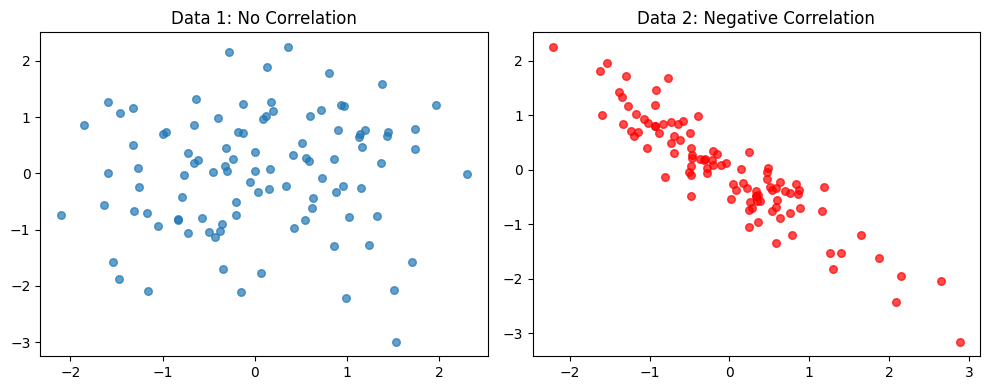

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(data1[:, 0], data1[:, 1], s=30, alpha=0.7)
ax1.set_title("Data 1: No Correlation")
ax2.scatter(data2[:, 0], data2[:, 1], s=30, alpha=0.7, color='red')
ax2.set_title("Data 2: Negative Correlation")
plt.tight_layout()
plt.show()

Data 1:
- The scatterplot shows no clear pattern or trend.
- Points are scattered randomly without any discernible relationship between X and Y.
- This suggests no correlation between the variables.

Data 2:
- The scatterplot shows a downward-sloping pattern.
- As X values increase, Y values tend to decrease.
- This indicates a negative correlation between the variables.

In [57]:
pca1 = PCA(n_components = 1)
princ1 = pca1.fit(data1)
print("The percentage of total variability explained by the first principal component is", "{:.00%}".format(princ1.explained_variance_ratio_[0]))

The percentage of total variability explained by the first principal component is 54%


The first principal component captures the direction of maximum variance in the data.
- For data1, with no dominant direction of spread, PC1 might not explain a large portion of the total variance, as points are distributed equally in all directions.
- For data2, where points are concentrated along a diagonal direction due to the negative correlation, PC1 is likely to align with this direction and capture a significant portion of the total variance.

Therefore, we can predict that data2 has a **higher percentage** of total variability explained by its first principal component compared to data1.

In [224]:
pca2 = PCA(n_components = 1)
princ2 = pca2.fit(data2)
print("The percentage of total variability explained by the first principal component is", "{:.00%}".format(princ2.explained_variance_ratio_[0]))

The percentage of total variability explained by the first principal component is 96%


In [225]:
pca2.components_

array([[-0.72327683,  0.6905582 ]])

In [ ]:
def line(point1, point2)

The first component for data 2 is [-0.72327683  0.6905582 ]


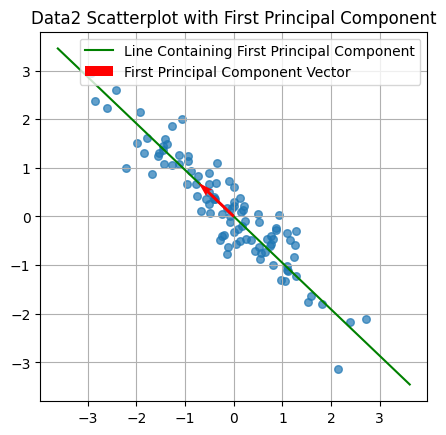

In [403]:
first_pc = pca2.components_[0]
fig, ax = plt.subplots()
print("The first component for data 2 is", first_pc)
plt.scatter(data2[:, 0], data2[:, 1], s=30, alpha=0.7)
plt.plot([-first_pc[0]*5, first_pc[0]*5], [-first_pc[1]*5, first_pc[1]*5], color='g', label='Line Containing First Principal Component')
plt.title("Data2 Scatterplot with First Principal Component")
ax.set_aspect('equal')
ax.quiver(0, 0, first_pc[0], first_pc[1], angles='xy', scale_units='xy', scale=1, color='r', label = 'First Principal Component Vector', zorder=10)
plt.legend()
plt.grid(True)
plt.show()

In [389]:
first_pc

array([-0.72327683,  0.6905582 ])

### Problem 2

In [322]:
data3 = pd.read_csv("imdb-dataset.csv")
rev = data3.loc[:,'review']
sent = data3.loc[:, 'sentiment']

In [381]:
import re
import string
from bs4 import BeautifulSoup
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [349]:
def clean_text(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    # Remove punctuation and special characters
    text = re.sub(r"[^\w\s]", " ", text)
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the processed words back into a string
    clean_text = ' '.join(lemmatized_words)
    return clean_text

In [350]:
cleaned_text = np.vectorize(clean_text)(rev)
for index in indices:
    content = cleaned_text[index]
    print("Review ", index, end="")
    print(": ", content)
    print()

/var/folders/9j/63cw8wmd6qg8x_p0ffm9yqk00000gn/T/ipykernel_17149/496528003.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Review  37306:  ending made heart jump throat proceeded leave movie theater little jittery nearly midnight movie better expected know last long theater make much money anticipated definitely would recommend

Review  22629:  tried rent many occasion always girlfriend general rule usually reject heist flick ensemble comedy comment uhm look good mood movie thus entereth almighty solo movie night anyway found welcome collinwood rather enjoyable movie ultimately fairly forgettable moment fun laugh loud moment unfamiliar fact remake general rule watch movie trying ignore fact watch merit anyway george clooney put humorous brief cameo wheeled safe cracker part left wondering two thing every comedy better mr clooney put strange minute cameo make fake tattoo look old faded easily wash cast fine actor right put great job get impression good time working together fairly important movie like needle say go planned movie plot wise humor wise made check special feature consider watching original cons

In [353]:
mycount = CountVectorizer()
bag = mycount.fit_transform(cleaned_text)
print("There are %d columns in the term frequency count vector" %(bag.shape[1]))

There are 92331 columns in the term frequency count vector


In [379]:
tfidf = TfidfTransformer()
bagX = tfidf.fit_transform(bag)
X_train = bagX[:25000]
y_train = sent[:25000].to_numpy()
X_test = bagX[25000:]
y_test = sent[25000:].to_numpy()

In [383]:
logreg = LogisticRegression()
lgModel = logreg.fit(X_train, y_train)
predictions = lgModel.predict(X_test)
print("The accuracy score using Logistic Regression is", "{:.00%}".format(accuracy_score(predictions, y_test)))

The accuracy score using Logistic Regression is 89%


### Problem 3

In [156]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
data4X = breast_cancer_wisconsin_diagnostic.data.features 
data4y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
# print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
# print(breast_cancer_wisconsin_diagnostic.variables) 

In [157]:
trainX = data4X.loc[:455,:]
trainy = data4y.loc[:455, 'Diagnosis'].T
testX = data4X.loc[456:,:]
testy = data4y.loc[456:, 'Diagnosis'].T
trainX

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.44,30.96,139.80,1421.0,0.1528,0.1845,0.39770,0.14660,0.2293,0.06091
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194
453,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
454,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.34,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330


In [149]:
neighModel = KNeighborsClassifier(n_neighbors=5)
neighModel.fit(trainX, trainy)
print("The accuracy score for 5-Nearest Neightbor Model is", neighModel.score(testX, testy))

The accuracy score for 5-Nearest Neightbor Model is 0.9380530973451328


In [265]:
# Without Normalization
pcaModel = PCA(n_components = 30)
prinComp = pcaModel.fit(data4X)
cumPercentage1 = np.cumsum(prinComp.explained_variance_ratio_)
cumPercentage1

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [207]:
# With Normalization using Normalizer
transformer = Normalizer().fit(data4X)
newX = transformer.transform(data4X)
normalizedPCA = PCA(n_components = 30)
normalizedComp = normalizedPCA.fit(newX)
cumPercentage2 = np.cumsum(normalizedComp.explained_variance_ratio_)
cumPercentage2

array([0.76709045, 0.94500855, 0.98475325, 0.99688563, 0.99877802,
       0.99939466, 0.99986228, 0.99993073, 0.99996344, 0.99998911,
       0.99999581, 0.99999768, 0.99999856, 0.99999915, 0.99999939,
       0.99999958, 0.99999971, 0.99999982, 0.99999989, 0.99999992,
       0.99999995, 0.99999997, 0.99999998, 0.99999999, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ])

Number of principal components necessary to explain 90% of the total variability is 2


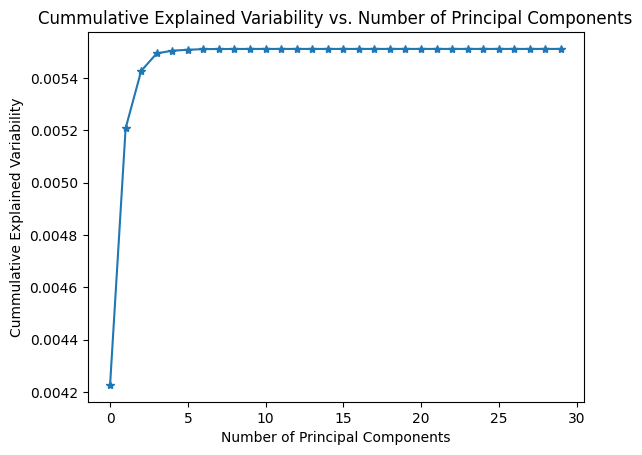

In [404]:
plt.plot(range(0,30), np.cumsum(normalizedComp.explained_variance_), marker='*')
plt.title('Cummulative Explained Variability vs. Number of Principal Components')
plt.ylabel('Cummulative Explained Variability')
plt.xlabel('Number of Principal Components')
#plt.bar(range(0,30), normalizedComp.explained_variance_ratio_, alpha=0.3)
index = np.where(cumPercentage2 > 0.9)[0][0]
print('Number of principal components necessary to explain 90% of the total variability is', index+1)
plt.show()